In [55]:
import tweepy
import json
from textblob import TextBlob
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()
import statsmodels.api as sm
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [56]:
# bot account training set
df_bots = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/traditional_spambots_3.csv/users.csv')
# human account training set
df_human = pd.read_csv('/Users/ramiroochoa/Desktop/cresci-2017.csv/datasets_full.csv/genuine_accounts.csv/users.csv')


## Create Bot DataFrame

In [57]:
def mod_df(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
            'id',
            'statuses_count',
            'followers_count',
            'friends_count',
            'favourites_count',
            'listed_count',
            'created_at',
            'timestamp',

            
        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add bot identifier
    df['bot']=1

   
    return df

In [58]:
# modify bot dataframe features
mod_bots_df = mod_df(df_bots)

In [59]:
def get_frequency_bot(timestamp):
    bot_year = []
    for i in range(len(bot_time)):
        y = int(bot_time[i][:4])
        bot_year.append(y)

    bot_yrs = []
    for i in bot_year:
        yr = 2018 - i
        bot_yrs.append(yr)

    bot_count = mod_bots_df['statuses_count']

    bot_freq = []
    s=0
    for i in bot_count:
        ya = i/bot_yrs[s]
        s+=1
        bot_freq.append(ya)
    return bot_freq


In [60]:
# get bots timestamp
bot_time = mod_bots_df['timestamp']
# call timestamp to frequency function
bot_freq = get_frequency_bot(bot_time)
# add feautre to dataframe
mod_bots_df['bot_freq']=bot_freq

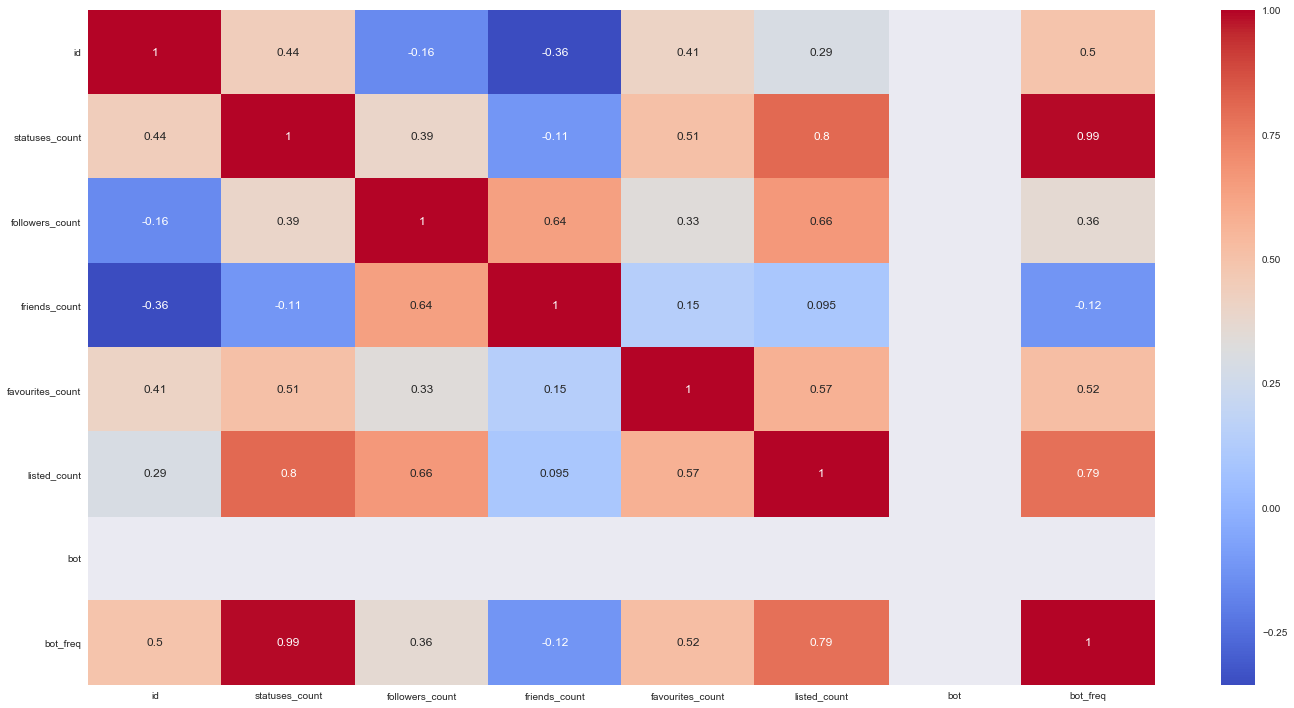

In [61]:
# view dataframe heatmap corrleations
plt.figure(figsize=(20,10))
sns.heatmap(mod_bots_df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Create Human Dataframe

In [62]:
def mod_df_human(df):
    
    # customize table to remove undesirable columns
    columns = list(df)
    df = df[[
     'id',
     'name',
     'screen_name',
     'statuses_count',
     'followers_count',
     'friends_count',
     'favourites_count',
     'listed_count',
     'created_at',
     'timestamp',

        ]].copy()
    # add constant
    #df = sm.add_constant(df)
    # add human identifier
    df['bot']=0

    return df

In [63]:
def get_frequency_human(timestamp):
    #mod_hum_df['timestamp'][0][:4]
    hum_year = []
    for i in range(len(hum_time)):
        y = int(hum_time[i][:4])
        hum_year.append(y)
    hum_yrs = []
    for i in hum_year:
        ya = 2018 - i
        hum_yrs.append(ya)
    hum_count = df_human['statuses_count']
    hum_freq = []
    s=0
    for i in hum_count:
        ya = i/hum_yrs[s]
        s+=1
        hum_freq.append(ya)
    return hum_freq

In [64]:
# remove undesireable features
mod_hum_df = mod_df_human(df_human)


In [65]:
# get human timestamp
hum_time = df_human['timestamp']
# call timestamp to frequency function
hum_freq = get_frequency_human(hum_time)
# add feautre to dataframe
mod_hum_df['hum_freq']=hum_freq

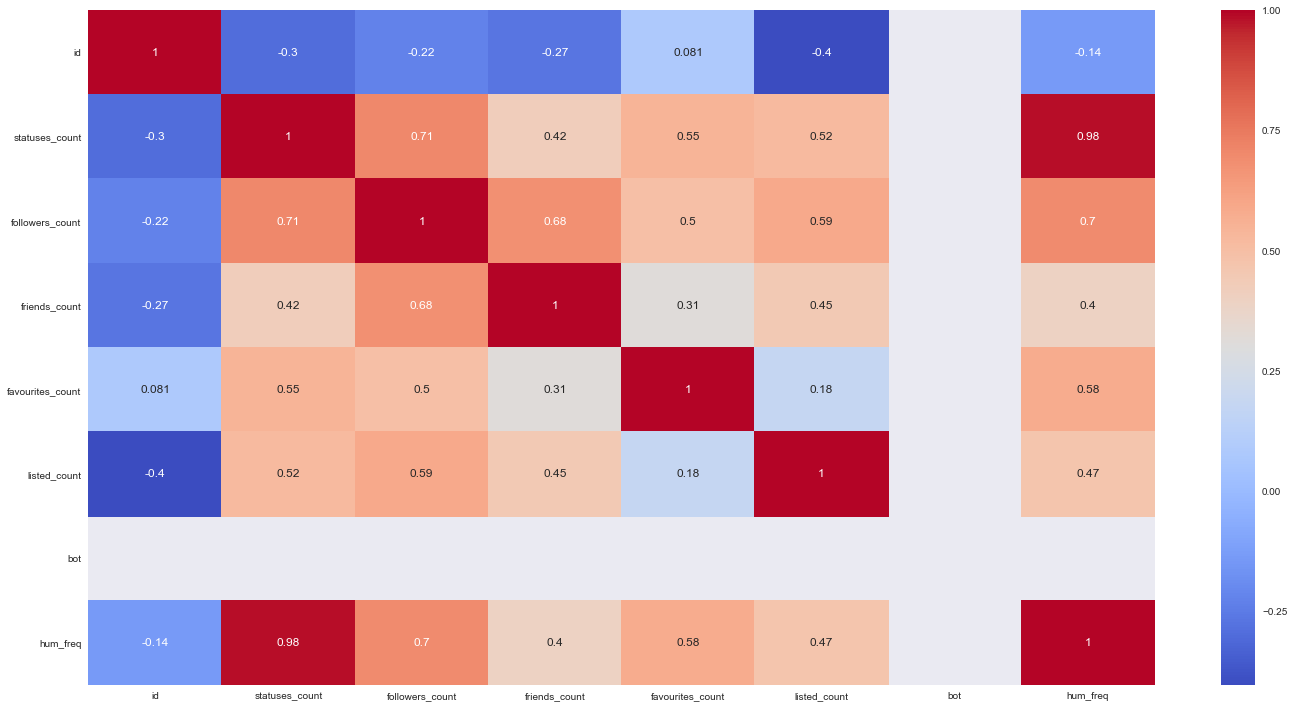

In [66]:
# view human features heatmap
plt.figure(figsize=(20,10))
sns.heatmap(mod_hum_df.corr(method='spearman'), cmap='coolwarm', annot=True)
plt.tight_layout()
plt.show()

## Merge Dataframes

In [ ]:
# create new dataframe
super_df = pd.DataFrame()

In [ ]:
# merge  dataframes
def merge_df(df1, df2):
    # clean merged dataframe
    
    
    
    
    
    
    return df
    
  